# IAU Projekt

# Fáza 1

### Zadanie (the quest)

* Každá dvojica bude pracovať s pridelenou dátovou sadou (3. týždeň).
* Vašou úlohou je vedieť predikovať závislú hodnotu (indikator)

Budete sa musieť pritom vysporiadať s viacerými problémami, ktoré sa v dátach nachádzajú ako formáty dát, chýbajúce, vychýlené hodnoty a pod.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
filename_labor = "046/labor.csv"
labor = pd.read_csv(filename_labor, sep='\t')
labor.head()

,Unnamed: 0,weight,ssn,hemoglobin,alp,etytr,alt,erytrocyty,hbver,name,hematokrit,indicator,er-cv,leukocyty,smoker,relationship,ast,trombocyty
0,0,12.35740,803-27-3974,5.94182,86.80991,7.12559,2.18482,7.53345,7.51373,Kayla Rodriguez,6.98497,1.0,57.08422,7.21726,Y,married,77.99546,7.98017
1,1,118.10209,205-46-9278,6.45407,79.22919,5.34025,1.60706,6.53048,7.30977,Diane Holt,8.65706,1.0,63.49068,9.35320,no,widowed,31.27623,9.27384
2,2,89.97897,507-12-0831,9.73090,17.97254,9.49744,1.75153,5.96430,8.02289,David Bryant MD,7.46431,1.0,66.64176,7.36311,no,nop,52.03928,8.18942
3,3,137.89307,328-79-8098,8.65753,19.63713,8.90814,5.80869,8.47758,7.37768,Joshua Hickman,9.15039,1.0,62.03448,6.50476,no,single,63.20161,6.22091
4,4,95.55653,307-37-5739,5.96644,82.63100,6.84092,3.16471,7.38053,8.07490,Frank Glover,9.55976,1.0,79.48715,9.45322,N,married,28.53852,7.38761


In [4]:
filename_profiles = "046/profiles.csv"
profiles = pd.read_csv(filename_profiles, sep='\t')
profiles.head()

,Unnamed: 0,race,residence,job,birthdate,company,blood_group,sex,ssn,name
0,0,White,"108 Pham Loaf\r\nNew Shelby, IN 31526",Magazine features editor,2007/09/11,"Reynolds, Stewart and Tanner",O+,F,087-49-2961,Laura Valentine
1,1,Asian,"2246 Tammy Cliffs Apt. 057\r\nNorth Kim, MI 55878","Investment banker, operational",1971/05/20,Mcdonald-White,A-,F,704-69-2733,Angela Sullivan
2,2,White,"12245 Maxwell Island\r\nNorth Benjamin, KY 38697",Charity fundraiser,09 Oct 1945,"Waters, Davis and Mcintyre",AB+,F,787-12-1516,Haley Ramirez
3,3,White,17000 Saunders Circles Apt. 457\r\nDonaldhaven...,"Engineer, production","04/25/2006, 00:00:00",Watson and Sons,A+,F,127-86-0135,Mary Harris
4,4,Hawaiian,"43712 Andrea Expressway\r\nNorth Mckenzie, AZ ...",IT consultant,1936-03-01,Alvarez PLC,B+,M,875-46-1555,Jeremy James


### 1. Základný opis dát spolu s ich charakteristikami (5 bodov)

* Pre dosiahnutie plného počtu bodov uveďte
* počet záznamov,
* počet atribútov,
* ich typy,
* pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

#### DATASET labor.csv

In [11]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10002 non-null  int64  
 1   weight        10002 non-null  float64
 2   ssn           10002 non-null  object 
 3   hemoglobin    9972 non-null   float64
 4   alp           9972 non-null   float64
 5   etytr         9972 non-null   float64
 6   alt           9971 non-null   float64
 7   erytrocyty    9972 non-null   float64
 8   hbver         9972 non-null   float64
 9   name          10002 non-null  object 
 10  hematokrit    9972 non-null   float64
 11  indicator     10002 non-null  float64
 12  er-cv         9972 non-null   float64
 13  leukocyty     9972 non-null   float64
 14  smoker        10002 non-null  object 
 15  relationship  10002 non-null  object 
 16  ast           9972 non-null   float64
 17  trombocyty    9972 non-null   float64
dtypes: float64(13), int64(1), 

Pomocou tohto výpisu sa dajú zistiť všetky potrebné informácie:

- Počet záznamov (2. riadok): 10002 (0 - 10001)

- Počet atribútov (3. riadok): 18 (0 - 17)

- Typy atribútov (4. stĺpec v tabuľke): int64, float64, object

Okrem iného sa dá z toho vyčítať, že všetky hodnoty, ktoré nie sú typ číslo (int64, float64) nie sú žiadne, teda NaN hodnoty. Preto všetky záznamy patria nejakým osobám.

##### Deskriptívna štatistika

Podľa vypísaných dát je možné vidieť, že úplne prvý nemenovaný atribút je len na označenie, očíslovanie.


In [122]:
labor.duplicated().any()

False

V dátach sa nenachádzajú duplicitné záznamy.

###### Kategorické atribúty

Ďalší zaujímavý atribút je ssn. Ide o Social Security Number (SSN), ktoré sa používa podobne ako u nás číslo občianského preukazu, čiže ide len o administratívny údaj.

Teraz sa idem pozrieť na ostatné atribúty typu object a ich hodnoty.

In [14]:
labor['smoker'].value_counts()

no     5497
yes    2093
Y      1917
N       495
Name: smoker, dtype: int64

Hoci atribút 'smoker' je dopytovací, hodnoty sú štyri. Je pravdepodobné, že ide o označenie tých istých odovedí rôznym spôsobom, preto môžem zlúčiť hodnoty 'yes' s 'Y' a 'no' s 'N'.

In [17]:
labor.loc[(labor.smoker == 'Y'),'smoker']='yes'

In [19]:
labor.loc[(labor.smoker == 'N'),'smoker']='no'

In [20]:
labor['smoker'].value_counts()

no     5992
yes    4010
Name: smoker, dtype: int64

<AxesSubplot:ylabel='smoker'>

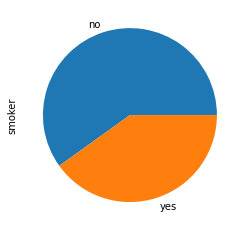

In [39]:
labor['smoker'].value_counts().plot(kind='pie')

In [21]:
labor['relationship'].value_counts()

divoced      2523
married      2474
single       2028
nop          1017
widowed       982
separated     978
Name: relationship, dtype: int64

Atribút 'relationship' neobsahuje žiadne NaN hodnoty alebo nejednoznačné typy hodnôt.

<AxesSubplot:>

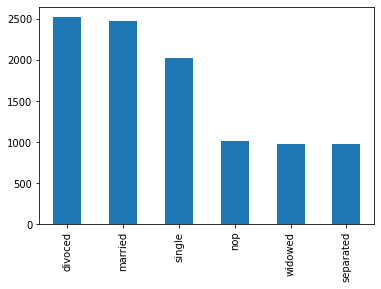

In [71]:
labor['relationship'].value_counts().plot(kind='bar')

###### Numerické artibúty:

In [23]:
labor.describe()

,Unnamed: 0,weight,hemoglobin,alp,etytr,alt,erytrocyty,hbver,hematokrit,indicator,er-cv,leukocyty,ast,trombocyty
count,10002.00000,10002.000000,9972.000000,9972.000000,9972.000000,9971.000000,9972.000000,9972.000000,9972.000000,10002.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,5000.50000,70.058861,7.605314,49.153497,7.199437,5.044637,7.617145,7.630895,8.399749,0.642172,52.472936,8.048166,48.112926,7.620192
std,2887.47303,34.958888,1.776103,26.764248,1.820026,5.034543,1.014691,0.998321,1.645404,0.479385,13.227003,1.437330,12.591762,1.023536
min,0.00000,-54.420260,1.094900,0.000000,0.000000,0.000000,3.748700,3.308740,2.638960,0.000000,0.000000,3.083190,0.000000,3.691730
25%,2500.25000,46.000222,6.312152,22.855040,5.915890,2.388415,6.939980,6.979278,7.311500,0.000000,43.539318,6.964645,39.480480,6.936850
50%,5000.50000,69.549650,7.696805,48.204640,7.213465,3.594600,7.625955,7.634975,8.468190,1.000000,52.512610,8.390985,48.209275,7.618780
75%,7500.75000,93.765605,8.926235,75.731703,8.536663,5.812480,8.299573,8.297892,9.556283,1.000000,61.322150,9.056192,56.575533,8.311490
max,10001.00000,196.504820,13.406460,100.000000,12.810620,100.000000,11.374090,11.543380,14.156900,1.000000,100.000000,12.962710,100.000000,11.523520


##### aa
###### 1. hmotnosť

Podľa opisu numerických atribútov som si všimla hneď jednu zvláštnosť. Minimálna hmotnosť je záporné číslo, čo v reálnom svete nie je možné. Preto sa na atribút hmotnosti idem pozrieť.

<AxesSubplot:ylabel='Frequency'>

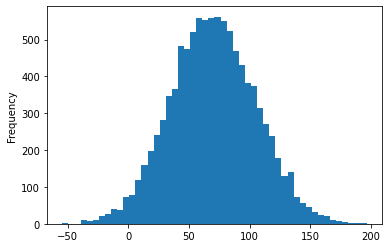

In [45]:
labor['weight'].plot.hist(bins=50)

<AxesSubplot:>

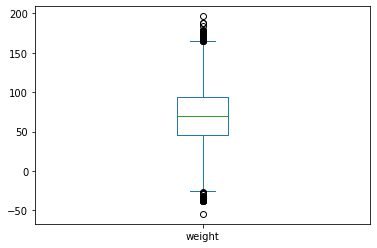

In [46]:
labor['weight'].plot.box()

Z tohto grafu je vidieť, že hmotnosť nie je uvedená vo všetkých záznamoch správne.

\* **nastaviť hodnoty na NaN??**

###### 2. hemoglobin

<AxesSubplot:ylabel='Frequency'>

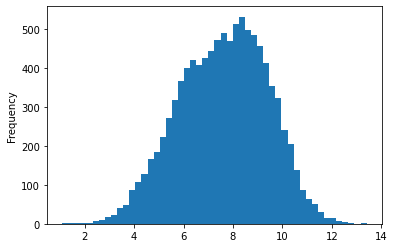

In [47]:
labor['hemoglobin'].plot.hist(bins=50)

<AxesSubplot:>

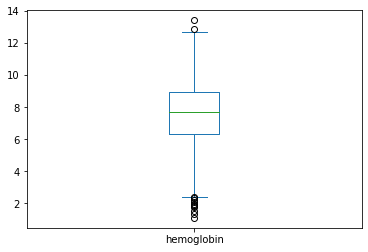

In [48]:
labor['hemoglobin'].plot.box()

###### 3. alp

<AxesSubplot:ylabel='Frequency'>

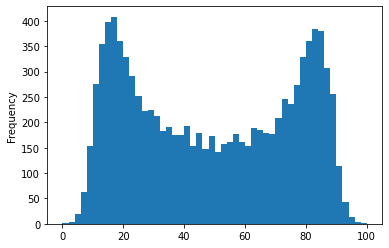

In [49]:
labor['alp'].plot.hist(bins=50)

<AxesSubplot:>

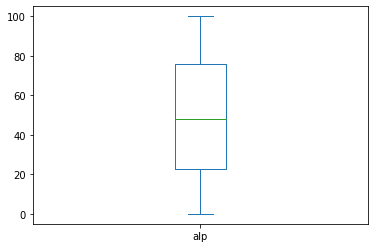

In [59]:
labor['alp'].plot.box()

###### 4. etytr

<AxesSubplot:ylabel='Frequency'>

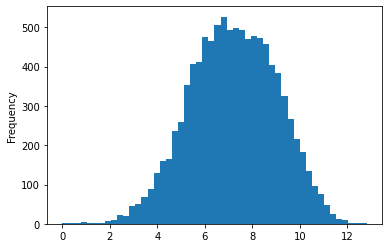

In [50]:
labor['etytr'].plot.hist(bins=50)

<AxesSubplot:>

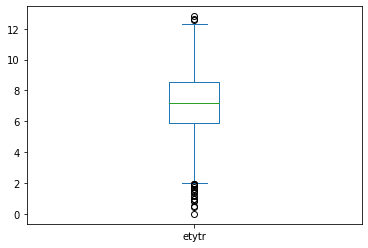

In [60]:
labor['etytr'].plot.box()

###### 5.alt

<AxesSubplot:ylabel='Frequency'>

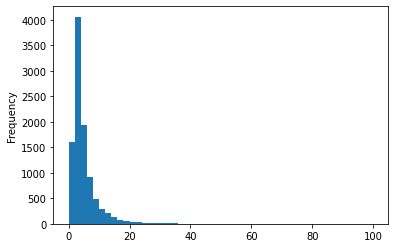

In [51]:
labor['alt'].plot.hist(bins=50)

<AxesSubplot:>

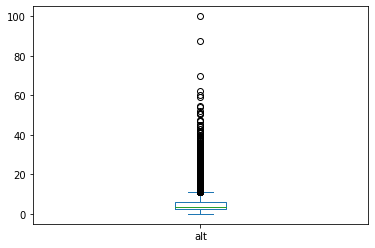

In [61]:
labor['alt'].plot.box()

###### 6. erytrocyty

<AxesSubplot:ylabel='Frequency'>

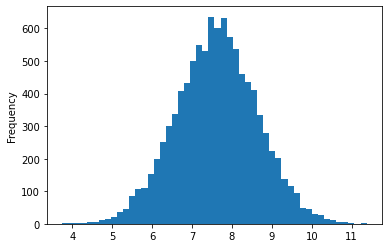

In [52]:
labor['erytrocyty'].plot.hist(bins=50)

<AxesSubplot:>

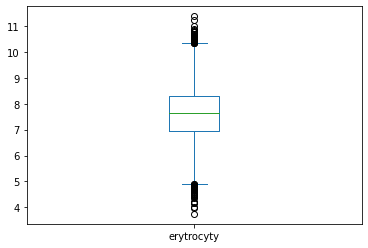

In [62]:
labor['erytrocyty'].plot.box()

###### 7.hbver

<AxesSubplot:ylabel='Frequency'>

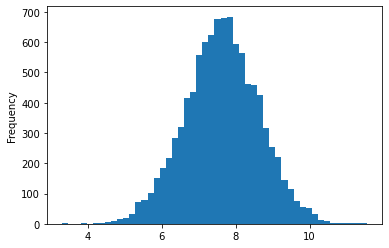

In [53]:
labor['hbver'].plot.hist(bins=50)

<AxesSubplot:>

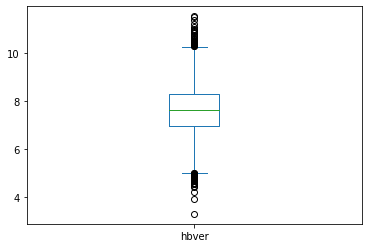

In [63]:
labor['hbver'].plot.box()

###### 8. hematokryt

<AxesSubplot:ylabel='Frequency'>

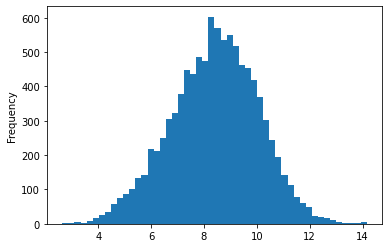

In [54]:
labor['hematokrit'].plot.hist(bins=50)

<AxesSubplot:>

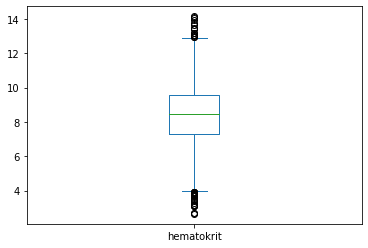

In [64]:
labor['hematokrit'].plot.box()

###### 9. indicator

<AxesSubplot:ylabel='Frequency'>

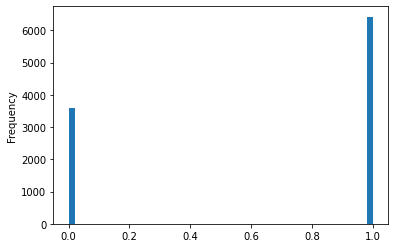

In [55]:
labor['indicator'].plot.hist(bins=50)

<AxesSubplot:>

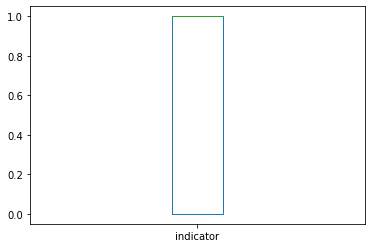

In [65]:
labor['indicator'].plot.box()

Tento atribút je špecialný, lebo zjavne nadobúda iba dve hodnoty.

###### 10. leukocyty

<AxesSubplot:ylabel='Frequency'>

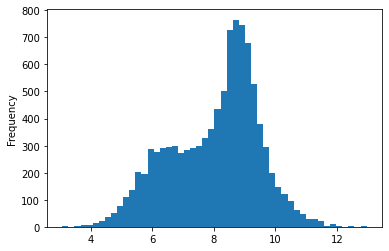

In [56]:
labor['leukocyty'].plot.hist(bins=50)

<AxesSubplot:>

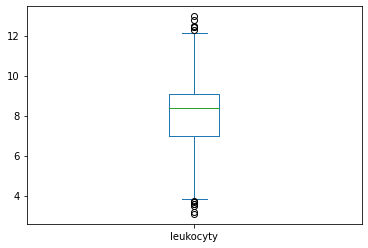

In [66]:
labor['leukocyty'].plot.box()

######  11. ast

<AxesSubplot:ylabel='Frequency'>

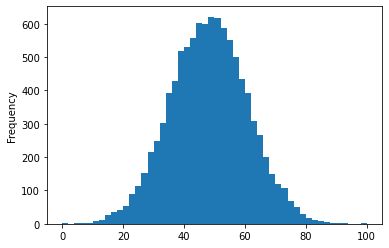

In [57]:
labor['ast'].plot.hist(bins=50)

<AxesSubplot:>

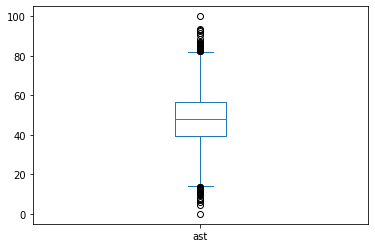

In [67]:
labor['ast'].plot.box()

###### 12. trombocyty

<AxesSubplot:ylabel='Frequency'>

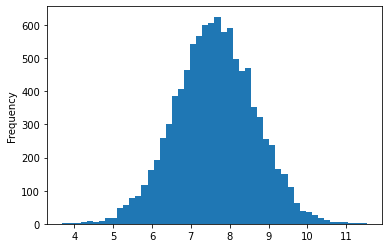

In [58]:
labor['trombocyty'].plot.hist(bins=50)

<AxesSubplot:>

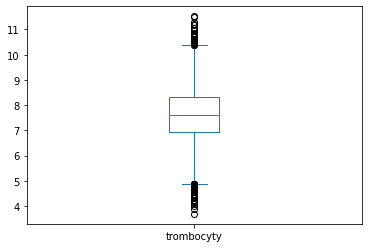

In [68]:
labor['trombocyty'].plot.box()

#### DATASET profiles.csv

In [25]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3097 non-null   int64 
 1   race         3097 non-null   object
 2   residence    3097 non-null   object
 3   job          3097 non-null   object
 4   birthdate    3097 non-null   object
 5   company      3097 non-null   object
 6   blood_group  3097 non-null   object
 7   sex          3097 non-null   object
 8   ssn          3097 non-null   object
 9   name         3097 non-null   object
dtypes: int64(1), object(9)
memory usage: 242.1+ KB


Pomocou tohto výpisu sa dajú zistiť všetky potrebné informácie:

- Počet záznamov (2. riadok): 3097 (0 - 3096)

- Počet atribútov (3. riadok): 10 (0 - 9)

- Typy atribútov (4. stĺpec v tabuľke): int64, object

Okrem iného sa dá z toho vyčítať, že všetky zápisy nemajú žiadne NaN hodnoty, lebo počet všetkých záznamov sa rovná počtu hodnôt pre každý atribút

In [123]:
profiles.duplicated().any()

False

To znamená, že v dátach nie sú žiadne duplicitné záznamy.

##### Deskriptívna štatistika

Podľa vypísaných dát v zadaní je možné vidieť, že úplne prvý nemenovaný atribút je len na označenie, očíslovanie.


###### Kategorické atribúty

##### bb

###### 1. race

In [72]:
profiles['race'].value_counts()

White       1576
Black        780
Asian        296
Hawaiian     152
Indian       135
black         93
white         33
blsck         32
Name: race, dtype: int64

Tento atribút obsahuje nejednotné formáty: White - white, Black - black, blsck (zjavne ide iba o preklep pri písaní).

In [80]:
profiles.loc[profiles['race'] == 'white', 'race'] = 'White'

In [79]:
profiles.loc[(profiles['race'] == 'black') | (profiles['race'] =='blsck'), 'race'] = 'Black'

<AxesSubplot:>

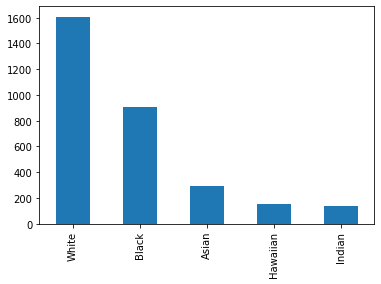

In [82]:
profiles['race'].value_counts().plot(kind='bar')

###### 2. residence

In [83]:
profiles['residence'].value_counts()

108 Pham Loaf\r\nNew Shelby, IN 31526                          1
USNS Gibson\r\nFPO AE 09764                                    1
40320 Arnold Trail Apt. 961\r\nWest Thomasside, DC 80884       1
193 Susan Extension Suite 716\r\nLake Heatherbury, MN 20055    1
339 Nixon Glens Apt. 350\r\nLake Jacqueline, CO 89469          1
                                                              ..
4975 Goodman Cliff\r\nGrayburgh, WV 54968                      1
837 Lisa River\r\nLewisfort, NE 65967                          1
54789 John Inlet Apt. 939\r\nEricksonview, MN 38512            1
312 Dennis Keys Apt. 338\r\nLake Leslie, WA 15189              1
601 Lawrence Parks\r\nLisachester, NM 26942                    1
Name: residence, Length: 3097, dtype: int64

###### 3. job

In [102]:
profiles['job'].value_counts()

Environmental consultant       12
Engineer, drilling             12
Secretary, company             12
Actor                          11
Merchant navy officer          11
                               ..
Nature conservation officer     1
Buyer, retail                   1
Child psychotherapist           1
Retail manager                  1
Music tutor                     1
Name: job, Length: 630, dtype: int64

###### 4. birthday

In [103]:
profiles['birthdate'].value_counts()

01/14/1908, 00:00:00    2
02/04/1968, 00:00:00    2
1927-08-28              2
03/16/1970, 00:00:00    2
1970/10/19              2
                       ..
1983/04/16              1
10 Dec 1956             1
09 Dec 1981             1
1946/11/15              1
07/16/1922, 00:00:00    1
Name: birthdate, Length: 3058, dtype: int64

Už iba podľa malého náhľadú na hodnoty tohto atribútu vidno, že dátumy sú nejednotné. Vhodné by bolo ich mať v jednom formáte.

In [110]:
profiles['birthdate'] = pd.to_datetime(profiles['birthdate'], utc=False)

In [111]:
profiles['birthdate'].value_counts()

1997-08-13    4
2013-01-20    3
1927-09-05    3
1912-08-31    2
1932-01-29    2
             ..
1945-04-22    1
1984-08-06    1
1950-07-18    1
1947-10-13    1
1922-07-16    1
Name: birthdate, Length: 2956, dtype: int64

Ešte skontrolujem rozsah

In [119]:
# profiles.sort_values(by=['birthdate'])
profiles['birthdate'].describe(datetime_is_numeric=True)

count                             3097
mean     1963-09-12 20:10:18.404907968
min                1905-10-08 00:00:00
25%                1933-08-07 00:00:00
50%                1963-12-27 00:00:00
75%                1992-09-23 00:00:00
max                2021-09-14 00:00:00
Name: birthdate, dtype: object

###### 5. company

In [100]:
profiles['company'].value_counts()

Smith Ltd                 7
Allen Inc                 5
Johnson Inc               5
Johnson Ltd               5
Smith LLC                 5
                         ..
Jenkins-Moore             1
Graham LLC                1
Mack, Martin and Moore    1
Austin-Wells              1
Price-Joseph              1
Name: company, Length: 2914, dtype: int64

###### 6. blood_group

In [97]:
profiles['blood_group'].value_counts()

A-     407
A+     400
B+     399
B-     399
AB+    378
O+     373
O-     371
AB-    370
Name: blood_group, dtype: int64

<AxesSubplot:>

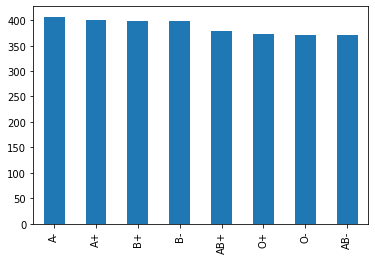

In [99]:
profiles['blood_group'].value_counts().plot(kind='bar')

######  7. sex

In [92]:
profiles['sex'].value_counts()

F    1568
M    1529
Name: sex, dtype: int64

V tomto prípade, všetky typy atribútov majú jednotný formát. A je vidno, že rozdelenie pohlavia je približne rovnaké.

<AxesSubplot:ylabel='sex'>

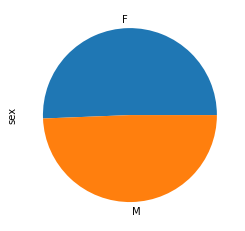

In [96]:
profiles['sex'].value_counts().plot(kind='pie')

###### 8. ssn

In [91]:
profiles['ssn'].value_counts()

087-49-2961    1
049-29-3450    1
413-78-6839    1
490-12-7724    1
668-35-1604    1
              ..
759-31-2559    1
882-93-4577    1
310-81-4482    1
761-96-7670    1
127-21-2115    1
Name: ssn, Length: 3097, dtype: int64

Atribút SSN je Social Security Number, ktoré sa používa podobne ako u nás číslo občianského preukazu, čiže ide len o administratívny údaj.

###### 9. name

In [86]:
profiles['name'].value_counts()

Mark Smith          3
Michael Smith       3
Pamela Wilson       3
Jennifer Brown      3
Jennifer Johnson    2
                   ..
Tony Watts          1
Andrew Ballard      1
Alan Johnson        1
Trevor Johnson      1
Chelsea Anderson    1
Name: name, Length: 3034, dtype: int64

Je zaujímavé, že Michael Smith je v záznamoch trikrát, pričom podľa údajov o rezidencií ide o 3097 unikátnych záznamov. Preto sa na to idem pozrieť.

In [90]:
profiles.loc[profiles['name'] == 'Mark Smith']

,Unnamed: 0,race,residence,job,birthdate,company,blood_group,sex,ssn,name
921,921,White,"96790 Jacob Turnpike\r\nLake Kimberlyside, HI ...",Warehouse manager,"03/06/1938, 00:00:00",Dawson-Carpenter,A-,M,071-58-7576,Mark Smith
1013,1013,Asian,USNV Smith\r\nFPO AE 46399,"Programmer, multimedia",11 Dec 1928,"Tyler, Leonard and Gibson",B+,M,400-39-6824,Mark Smith
1167,1167,Black,"47223 Hardy Pass\r\nRoyberg, TN 60264",Administrator,1961-07-29,Frost Ltd,O-,M,385-58-1304,Mark Smith


Zistila som, že aj napriek tomu, že sa niekto nachdáza v tabuľke viackrát, ide zjavne o menovca, lebo Mark Smith by nemohol mať toľko rôznych osobných údajov, a pritom by malo ísť o tú istú osobu.

###### Numerické atribúty

Záznamy neobsahujú žiadne numerické atribúty okrem spomínaného prvého atribútu, ale ten možno pokladať za číslovanie.

### 2. Párová analýza dát (5 bodov)
* Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
* Identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.

### 3. Formulácia a štatistické overenie hypotéz o dátach (2 body)
* Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Príkladom je napr. pacienti v zlepšenom stave majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti v nezlepšenom stave.
* Sformulované hypotézy overte vhodne zvoleným štatistickým testom.

### 4. Identifikácia problémov v dátach s navrhnutým riešením (3 body)
* Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
* Navrhnuté riešenie prvotne realizujte na dátach.

Boli identifikované tieto problémy:
- nejednotné formáty (v obidvoch súboroch atribúty smoker, race, birthday)
- vychýlené hodnoty (v súbore atribút weight) **//aj birthday**

Všetky problémy boli už v prvej časti odstránené, aby bola priekumná analýza presnejšia

### Správa sa odovzdáva v 6. týždni semestra

* Na cvičení, dvojica svojmu cvičiacemu odprezentuje vykonanú prieskumnú analýzu v Jupyter Notebooku.
* Správu elektronicky odovzdá jeden člen z dvojice do systému AIS do nedele 31.10.2021 23:59.